In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from joblib import dump

In [2]:
df=pd.read_csv('../data/raw/train.csv')

In [3]:
print(df.head(5))

   Id_old    Id  GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA  ...  FTA   FT%  \
0   10556  3799  80  24.3   7.8  3.0  6.4  45.7      0.1  0.3  ...  2.9  72.1   
1    5342  3800  75  21.8  10.5  4.2  7.9  55.1     -0.3 -1.0  ...  3.6  67.8   
2    5716  3801  85  19.1   4.5  1.9  4.5  42.8      0.4  1.2  ...  0.6  75.7   
3   13790  3802  63  19.1   8.2  3.5  6.7  52.5      0.3  0.8  ...  1.5  66.9   
4    5470  3803  63  17.8   3.7  1.7  3.4  50.8      0.5  1.4  ...  0.5  54.0   

   OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0   2.2   2.0  3.8  3.2  1.1  0.2  1.6            1  
1   3.6   3.7  6.6  0.7  0.5  0.6  1.4            1  
2   0.6   1.8  2.4  0.8  0.4  0.2  0.6            1  
3   0.8   2.0  3.0  1.8  0.4  0.1  1.9            1  
4   2.4   2.7  4.9  0.4  0.4  0.6  0.7            1  

[5 rows x 22 columns]


In [4]:
df.shape

(8000, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id_old       8000 non-null   int64  
 1   Id           8000 non-null   int64  
 2   GP           8000 non-null   int64  
 3   MIN          8000 non-null   float64
 4   PTS          8000 non-null   float64
 5   FGM          8000 non-null   float64
 6   FGA          8000 non-null   float64
 7   FG%          8000 non-null   float64
 8   3P Made      8000 non-null   float64
 9   3PA          8000 non-null   float64
 10  3P%          8000 non-null   float64
 11  FTM          8000 non-null   float64
 12  FTA          8000 non-null   float64
 13  FT%          8000 non-null   float64
 14  OREB         8000 non-null   float64
 15  DREB         8000 non-null   float64
 16  REB          8000 non-null   float64
 17  AST          8000 non-null   float64
 18  STL          8000 non-null   float64
 19  BLK   

In [6]:
df.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [7]:
df_cleaned = df.drop(['Id_old','Id'],axis=1)

In [8]:
x=df_cleaned.drop('TARGET_5Yrs',axis=1)
y=df_cleaned['TARGET_5Yrs']

In [9]:
y.value_counts(normalize=True)

1    0.833625
0    0.166375
Name: TARGET_5Yrs, dtype: float64

In [10]:
x_data , x_val ,y_data,  y_val = train_test_split(x, y, test_size=0.2, random_state = 8)
x_train , x_test , y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 8)

In [11]:
np.save('../data/processed/X_train', x_train)
np.save('../data/processed/X_val',   x_val)
np.save('../data/processed/X_test',  x_test)
np.save('../data/processed/y_train', y_train)
np.save('../data/processed/y_val',   y_val)
np.save('../data/processed/y_test',  y_test)

In [12]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape,y_val.shape)

(5120, 19) (5120,)
(1280, 19) (1280,)
(1600, 19) (1600,)


In [13]:
y_train.value_counts(normalize=True)

1    0.837109
0    0.162891
Name: TARGET_5Yrs, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

1    0.8125
0    0.1875
Name: TARGET_5Yrs, dtype: float64

In [15]:
y_val.value_counts(normalize=True)

1    0.839375
0    0.160625
Name: TARGET_5Yrs, dtype: float64

In [16]:
y_shape = (len(x_train),1)

In [17]:
y_base = np.full(y_shape,y_train.mode())

In [18]:
y_base.shape

(5120, 1)

In [19]:
accuracy_score(y_train, y_base)

0.837109375

In [20]:
f1_score(y_train, y_base)

0.9113331915798427

In [21]:
rf2 = RandomForestClassifier(random_state=8)

In [22]:
rf2.fit(x_train,y_train)

RandomForestClassifier(random_state=8)

In [23]:
print(rf2.score(x_train, y_train))
print(rf2.score(x_test, y_test))

1.0
0.81015625


In [24]:
y_train_pred_rf2=rf2.predict(x_train)
accuracy_score(y_train,y_train_pred_rf2)

1.0

In [25]:
rf2.fit(x_test,y_test)

RandomForestClassifier(random_state=8)

In [27]:
y_test_pred_rf2=rf2.predict(x_test)
accuracy_score(y_test,y_test_pred_rf2)

1.0

In [28]:
rf3 = RandomForestClassifier(random_state=8, max_depth=10 )
rf3.fit(x_train,y_train)


print(rf3.score(x_train, y_train))
y_train_pred_rf3=rf3.predict(x_train)
print(accuracy_score(y_train,y_train_pred_rf3))

0.8814453125
0.8814453125


In [31]:
rf3.fit(x_test,y_test)
print(rf3.score(x_test, y_test))
y_test_pred_rf3=rf3.predict(x_test)
print(accuracy_score(y_test,y_test_pred_rf3))

0.9234375
0.9234375


In [32]:
def eval_model(mod, xvar, yvar,runtype):
  mod.fit(xvar,yvar)
  mod_pred=mod.predict(xvar)
  print('Accuracy Score',accuracy_score(yvar,mod_pred),'F1 Score',f1_score(yvar,mod_pred), 'R2 Score',mod.score(xvar, yvar),'(',runtype,')')
  disp = plot_confusion_matrix(mod, xvar, yvar, cmap=plt.cm.Blues, normalize='true')
  disp.ax_.set_title('Confusion matrix '+runtype)
  return

Accuracy Score 0.8814453125 F1 Score 0.9338707920252751 R2 Score 0.8814453125 ( train )
Accuracy Score 0.9234375 F1 Score 0.9550045913682277 R2 Score 0.9234375 ( test )


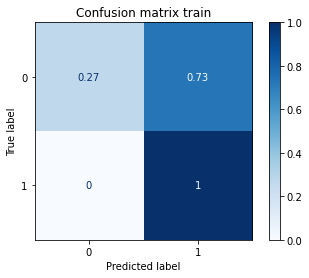

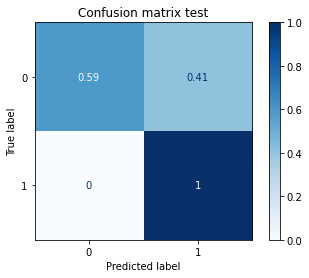

In [33]:
eval_model(rf3,x_train,y_train,"train")
eval_model(rf3,x_test,y_test,"test")

Accuracy Score 0.99921875 F1 Score 0.9995335820895522 R2 Score 0.99921875 ( train )
Accuracy Score 1.0 F1 Score 1.0 R2 Score 1.0 ( test )


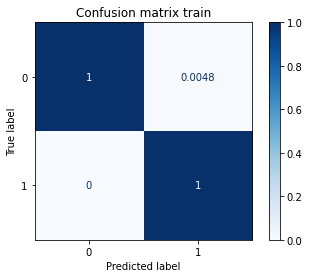

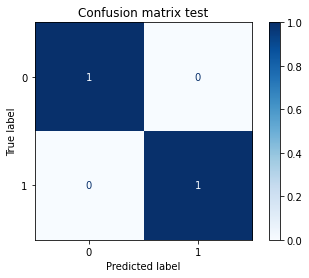

In [34]:
rf4 = RandomForestClassifier(random_state=8, max_depth=20 )
eval_model(rf4,x_train,y_train,"train")
eval_model(rf4,x_test,y_test,"test")

Accuracy Score 0.965234375 F1 Score 0.9796571428571429 R2 Score 0.965234375 ( train )
Accuracy Score 0.9953125 F1 Score 0.9971236816874401 R2 Score 0.9953125 ( test )


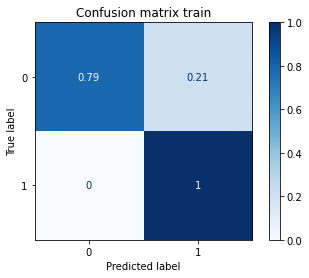

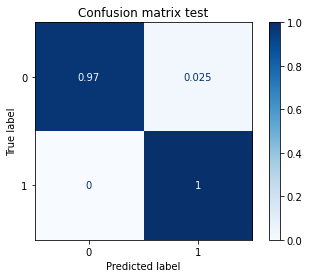

In [35]:
rf5 = RandomForestClassifier(random_state=8, max_depth=15 )
eval_model(rf5,x_train,y_train,"train")
eval_model(rf5,x_test,y_test,"test")

Accuracy Score 0.9419921875 F1 Score 0.9665125718795805 R2 Score 0.9419921875 ( train )
Accuracy Score 0.9765625 F1 Score 0.985781990521327 R2 Score 0.9765625 ( test )


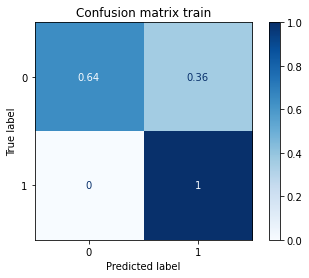

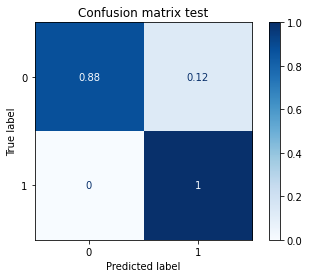

In [36]:
rf6 = RandomForestClassifier(random_state=8, max_depth=15, min_samples_split=5 )
eval_model(rf6,x_train,y_train,"train")
eval_model(rf6,x_test,y_test,"test")

Accuracy Score 0.88828125 F1 Score 0.9374316342157076 R2 Score 0.88828125 ( train )
Accuracy Score 0.89609375 F1 Score 0.9399005874378672 R2 Score 0.89609375 ( test )


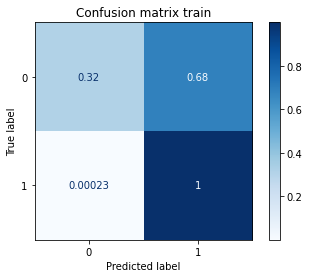

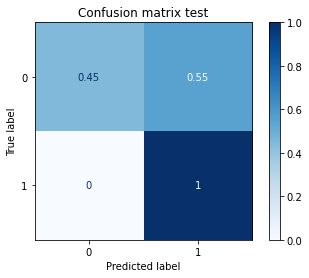

In [37]:
rf7 = RandomForestClassifier(random_state=8, max_depth=15, min_samples_split=15 )
eval_model(rf7,x_train,y_train,"train")
eval_model(rf7,x_test,y_test,"test")

Accuracy Score 0.906640625 F1 Score 0.9471706454465074 R2 Score 0.906640625 ( train )
Accuracy Score 0.9171875 F1 Score 0.9515096065873742 R2 Score 0.9171875 ( test )


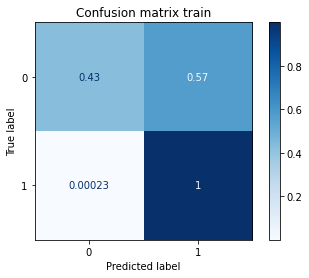

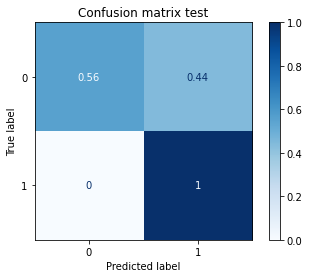

In [38]:
rf8 = RandomForestClassifier(random_state=8, max_depth=15, min_samples_split=10 )
eval_model(rf8,x_train,y_train,"train")
eval_model(rf8,x_test,y_test,"test")

Accuracy Score 0.875 F1 Score 0.9304952215464812 R2 Score 0.875 ( train )
Accuracy Score 0.87109375 F1 Score 0.9265033407572383 R2 Score 0.87109375 ( test )


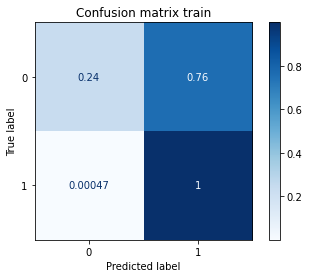

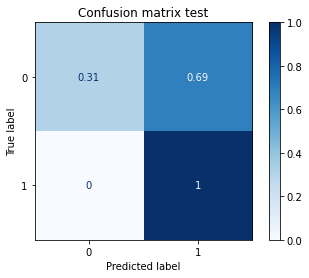

In [39]:
rf9 = RandomForestClassifier(random_state=8, max_depth=15, min_samples_split=5,min_samples_leaf=5 )
eval_model(rf9,x_train,y_train,"train")
eval_model(rf9, x_test,y_test,"test")

Accuracy Score 0.93359375 F1 Score 0.9618491921005387 R2 Score 0.93359375 ( train )
Accuracy Score 0.9625 F1 Score 0.9774436090225563 R2 Score 0.9625 ( test )


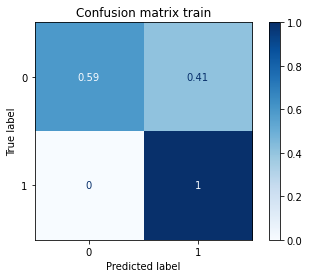

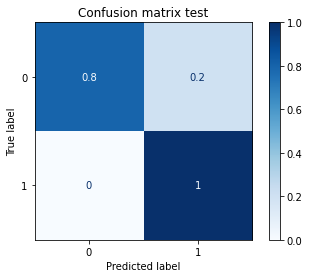

In [40]:
rf10 = RandomForestClassifier(random_state=8, max_depth=15, min_samples_split=5,min_samples_leaf=2 )
eval_model(rf10,x_train,y_train,"train")
eval_model(rf10, x_test,y_test,"test")

Accuracy Score 0.9130859375 F1 Score 0.9506487745369857 R2 Score 0.9130859375 ( train )
Accuracy Score 0.921875 F1 Score 0.9541284403669724 R2 Score 0.921875 ( test )


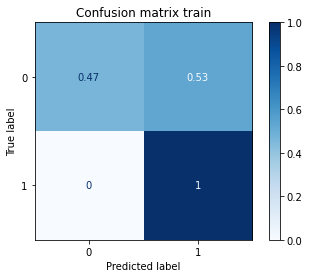

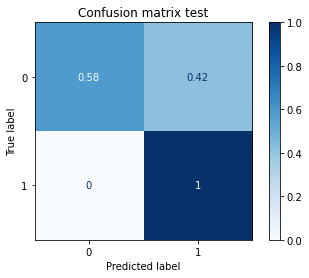

In [41]:
rf11 = RandomForestClassifier(random_state=8, max_depth=15, min_samples_split=5,min_samples_leaf=3)
eval_model(rf11,x_train,y_train,"train")
eval_model(rf11, x_test,y_test,"test")

Accuracy Score 0.9421875 F1 Score 0.9666215606675688 R2 Score 0.9421875 ( train )
Accuracy Score 0.96875 F1 Score 0.9811320754716981 R2 Score 0.96875 ( test )


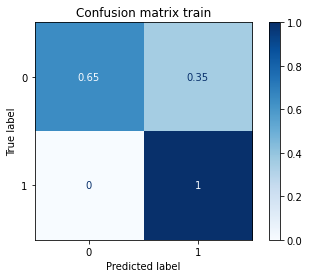

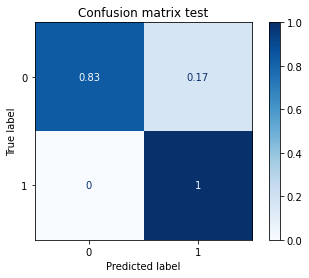

In [42]:
rf12 = RandomForestClassifier(random_state=8, max_depth=15, min_samples_leaf=2)
eval_model(rf12,x_train,y_train,"train")
eval_model(rf12, x_test,y_test,"test")

Accuracy Score 0.971484375 F1 Score 0.9832530396880018 R2 Score 0.971484375 ( train )
Accuracy Score 0.98671875 F1 Score 0.9918931807343825 R2 Score 0.98671875 ( test )


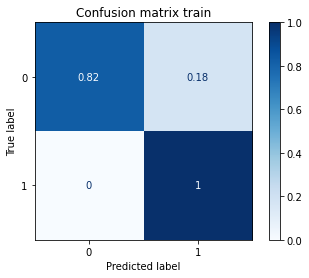

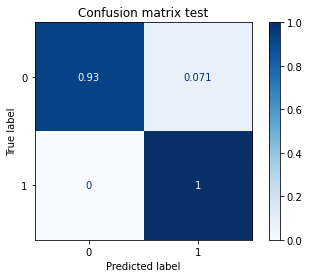

In [43]:
rf13 = RandomForestClassifier(random_state=8, max_depth=20, min_samples_leaf=2)
eval_model(rf13,x_train,y_train,"train")
eval_model(rf13, x_test,y_test,"test")

Accuracy Score 0.97578125 F1 Score 0.985740570377185 R2 Score 0.97578125 ( train )
Accuracy Score 0.984375 F1 Score 0.9904761904761905 R2 Score 0.984375 ( test )


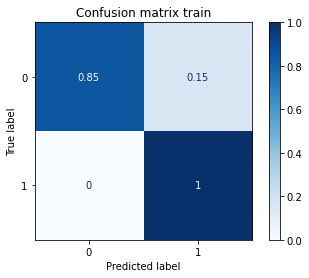

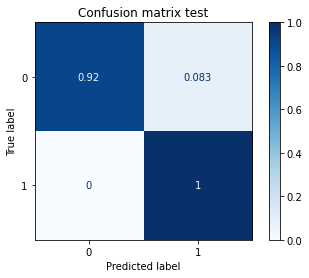

In [44]:
rf14 = RandomForestClassifier(random_state=8, max_depth=20, min_samples_leaf=2, n_estimators=500)
eval_model(rf14,x_train,y_train,"train")
eval_model(rf14, x_test,y_test,"test")

Accuracy Score 0.985546875 F1 Score 0.9914411288457089 R2 Score 0.985546875 ( train )
Accuracy Score 0.98984375 F1 Score 0.9937888198757764 R2 Score 0.98984375 ( test )


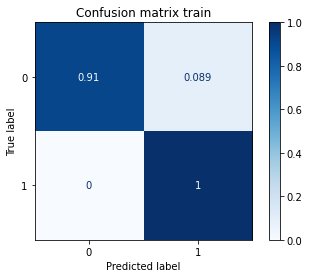

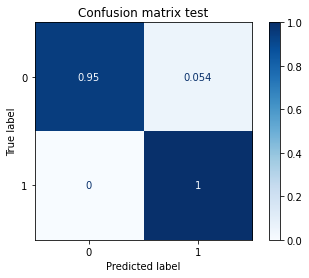

In [45]:
rf15 = RandomForestClassifier(random_state=8, max_depth=20, min_samples_leaf=2,n_estimators=500, max_features=10)
eval_model(rf15,x_train,y_train,"train")
eval_model(rf15, x_test,y_test,"test")

Accuracy Score 0.9794921875 F1 Score 0.9878990434481965 R2 Score 0.9794921875 ( train )
Accuracy Score 0.98359375 F1 Score 0.9900047596382676 R2 Score 0.98359375 ( test )


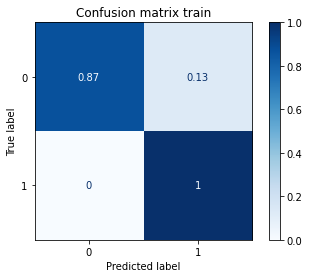

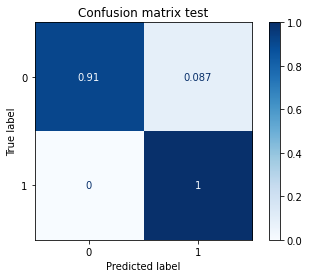

In [46]:
rf16 = RandomForestClassifier(random_state=8, max_depth=20, min_samples_leaf=2,n_estimators=500, max_features=5)
eval_model(rf16,x_train,y_train,"train")
eval_model(rf16, x_test,y_test,"test")

Accuracy Score 0.9876953125 F1 Score 0.9927041111754488 R2 Score 0.9876953125 ( train )
Accuracy Score 0.99140625 F1 Score 0.9947393591582974 R2 Score 0.99140625 ( test )


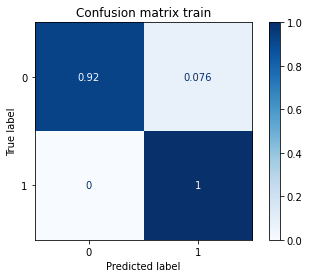

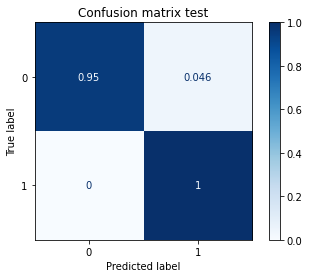

In [47]:
rf17 = RandomForestClassifier(random_state=8, max_depth=20, min_samples_leaf=2,n_estimators=500, max_features=15)
eval_model(rf17,x_train,y_train,"train")
eval_model(rf17, x_test,y_test,"test")

In [49]:
rf18 = RandomForestClassifier(random_state=8, max_depth=20, min_samples_leaf=2,n_estimators=500, max_features=15)
scores = cross_val_score(rf18, x, y,cv=10, scoring='f1')

In [53]:
print('Scores',scores)
print('Mean Score',scores.mean())
print('Standard Deviation Score',scores.std())

Scores [0.90796703 0.90959282 0.91121817 0.90571232 0.91059147 0.90696072
 0.90734386 0.90152566 0.91071429 0.90821256]
Mean Score 0.9079838894945393
Standard Deviation Score 0.002751029872792797


In [56]:
rf18.fit(x,y)
cv_rf18=rf18.predict(x)

In [57]:
print('Accuracy Score',accuracy_score(y,cv_rf18),'F1 Score',f1_score(y,cv_rf18), 'R2 Score',rf18.score(x, y),'(Cross Val Score Train)')

Accuracy Score 0.983375 F1 Score 0.9901269393511989 R2 Score 0.983375 (Cross Val Score Train)


Text(0.5, 1.0, 'Confusion matrix Cross Val Score Training')

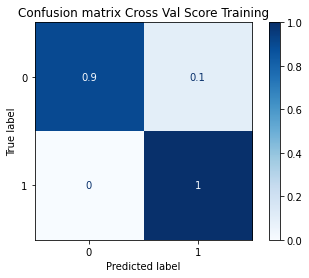

In [58]:
disp = plot_confusion_matrix(rf18, x, y, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Confusion matrix Cross Val Score Training')

In [67]:
from sklearn.model_selection import GridSearchCV

In [155]:
hyperparam_grid = {
    'max_depth': np.arange(10,50,10),
    'min_samples_leaf': np.arange(2,20,2),
    'n_estimators': np.array([500,550]),
    'max_features': np.arange(2,18,3)
}

# hyperparam_grid = {
#     'max_depth': np.arange(10,20,10),
#     'min_samples_leaf': np.arange(2,4,1),
#     'n_estimators': np.array([500]),
#     'max_features': np.arange(10,16,4)
# }

In [156]:
hyperparam_grid

{'max_depth': array([10, 20, 30, 40]),
 'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'n_estimators': array([500, 550]),
 'max_features': array([ 2,  5,  8, 11, 14, 17])}

In [157]:
rf19 = RandomForestClassifier(random_state=8)

In [158]:
grid_search_rf = GridSearchCV(rf19, hyperparam_grid, cv=2, scoring='f1', verbose=1)

In [159]:
grid_search_rf.fit(x_data, y_data)

Fitting 2 folds for each of 432 candidates, totalling 864 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': array([10, 20, 30, 40]),
                         'max_features': array([ 2,  5,  8, 11, 14, 17]),
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([500, 550])},
             scoring='f1', verbose=1)

In [160]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 4,
 'n_estimators': 550}

In [161]:
gs_rf19=grid_search_rf.predict(x_data)
print('Accuracy Score',accuracy_score(y_data,gs_rf19),'F1 Score',f1_score(y_data,gs_rf19), 'R2 Score',grid_search_rf.score(x_data, y_data),'(Grid Search Train)')

Accuracy Score 0.84734375 F1 Score 0.9159714457727702 R2 Score 0.9159714457727702 (Grid Search Train)


Text(0.5, 1.0, 'Confusion matrix Grid Search Train')

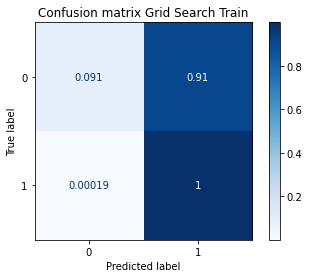

In [162]:
disp = plot_confusion_matrix(grid_search_rf, x_data, y_data, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Confusion matrix Grid Search Train')

Fitting 2 folds for each of 432 candidates, totalling 864 fits
Accuracy Score 0.9946875 F1 Score 0.9968182668912596 R2 Score 0.9936567164179104 (Grid Search Train)


Text(0.5, 1.0, 'Confusion matrix Grid Search Train')

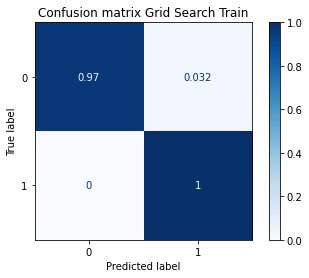

In [164]:
rf20 = RandomForestClassifier(random_state=8)
grid_search_rf1 = GridSearchCV(rf20, hyperparam_grid, cv=2, scoring='precision', verbose=1)
grid_search_rf1.fit(x_data, y_data)
gs_rf20=grid_search_rf1.predict(x_data)
print('Accuracy Score',accuracy_score(y_data,gs_rf20),'F1 Score',f1_score(y_data,gs_rf20), 'R2 Score',grid_search_rf1.score(x_data, y_data),'(Grid Search Train)')
disp = plot_confusion_matrix(grid_search_rf1, x_data, y_data, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Confusion matrix Grid Search Train')

In [165]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 4,
 'n_estimators': 550}

Fitting 2 folds for each of 432 candidates, totalling 864 fits
Accuracy Score 0.99296875 F1 Score 0.9956917185256103 R2 Score 0.9914204003813155 (Grid Search Test)


Text(0.5, 1.0, 'Confusion matrix Grid Search Train')

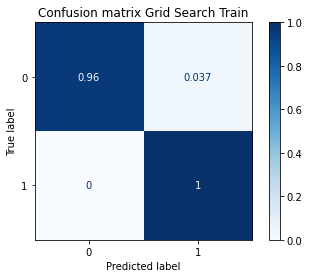

In [166]:
grid_search_rf1.fit(x_test, y_test)
gs_test_rf20=grid_search_rf1.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,gs_test_rf20),'F1 Score',f1_score(y_test,gs_test_rf20), 'R2 Score',grid_search_rf1.score(x_test, y_test),'(Grid Search Test)')
disp = plot_confusion_matrix(grid_search_rf1, x_test, y_test, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Confusion matrix Grid Search Test')

Fitting 2 folds for each of 432 candidates, totalling 864 fits
Accuracy Score 0.985 F1 Score 0.9911439114391144 R2 Score 0.9824433065106072 (Grid Search Test)


Text(0.5, 1.0, 'Confusion matrix Grid Search Train')

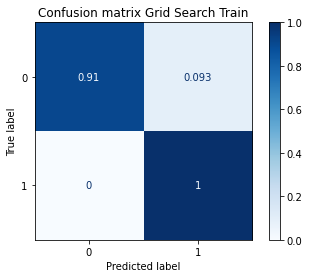

In [168]:
grid_search_rf1.fit(x_val, y_val)
gs_val_rf20=grid_search_rf1.predict(x_val)
print('Accuracy Score',accuracy_score(y_val,gs_val_rf20),'F1 Score',f1_score(y_val,gs_val_rf20), 'R2 Score',grid_search_rf1.score(x_val, y_val),'(Grid Search Test)')
disp = plot_confusion_matrix(grid_search_rf1, x_val, y_val, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Confusion matrix Grid Search Val')

In [169]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 4,
 'n_estimators': 550}

# Capture Results on Test Data

In [172]:
df_test=pd.read_csv('../data/raw/test.csv')

In [173]:
df_test.head(5)

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,...,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,...,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,3,2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,...,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,...,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,...,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


In [174]:
df_test.shape

(3799, 21)

In [175]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id_old   3799 non-null   int64  
 1   Id       3799 non-null   int64  
 2   GP       3799 non-null   int64  
 3   MIN      3799 non-null   float64
 4   PTS      3799 non-null   float64
 5   FGM      3799 non-null   float64
 6   FGA      3799 non-null   float64
 7   FG%      3799 non-null   float64
 8   3P Made  3799 non-null   float64
 9   3PA      3799 non-null   float64
 10  3P%      3799 non-null   float64
 11  FTM      3799 non-null   float64
 12  FTA      3799 non-null   float64
 13  FT%      3799 non-null   float64
 14  OREB     3799 non-null   float64
 15  DREB     3799 non-null   float64
 16  REB      3799 non-null   float64
 17  AST      3799 non-null   float64
 18  STL      3799 non-null   float64
 19  BLK      3799 non-null   float64
 20  TOV      3799 non-null   float64
dtypes: float64(18)

In [176]:
df_test.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,...,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,1899.000000,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,...,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,1096.821164,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,...,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,0.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,...,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,949.500000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,...,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,1899.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,...,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,2848.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,...,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,3798.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,...,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


In [180]:
df_actual_test_cleaned = df_test.drop(['Id_old', 'Id'], axis=1)

In [181]:
df_actual_test_cleaned.shape

(3799, 19)

In [143]:
y_actual_test_pred=rf15.predict(df_actual_test_cleaned)

In [147]:
y_actual_test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [151]:
np.unique(y_actual_test_pred,return_counts=True)

(array([0, 1], dtype=int64), array([  60, 3739], dtype=int64))

In [166]:
df_test['TARGET_5Yrs'] = y_actual_test_pred

In [153]:
df_actual_test_cleaned.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8,1
1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8,1
2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0,1
3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6,1
4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9,1


In [167]:
df_test['TARGET_5Yrs'].value_counts()

1    3739
0      60
Name: TARGET_5Yrs, dtype: int64

In [168]:
df_test.to_csv('../data/processed/TestResult.csv',index=True)

In [185]:
y_actual_test_pred_reg=rf16.predict(df_actual_test_cleaned)

In [186]:
y_actual_test_pred_reg

array([0.83690597, 0.7929326 , 0.94666667, ..., 0.89916667, 0.989     ,
       0.74416667])

In [188]:
np.unique(y_actual_test_pred_reg.round(),return_counts=True)

(array([0., 1.]), array([  61, 3738], dtype=int64))

In [189]:
df_test['TARGET_5Yrs'] = y_actual_test_pred_reg

In [191]:
df_test['TARGET_5Yrs'].round().value_counts(normalize=True)

1.0    0.983943
0.0    0.016057
Name: TARGET_5Yrs, dtype: float64

In [197]:
df_test.to_csv('../data/processed/TestResult_UsingRegressor.csv',index=False,columns=['Id', 'TARGET_5Yrs'])

In [183]:
y_actual_test_pred_rf20=grid_search_rf1.predict(df_actual_test_cleaned)
y_actual_test_pred_prob_rf20=grid_search_rf1.predict_proba(df_actual_test_cleaned)

In [184]:
np.unique(y_actual_test_pred_rf20,return_counts=True)

(array([0, 1], dtype=int64), array([  50, 3749], dtype=int64))

In [188]:
np.unique(y_actual_test_pred_prob_rf20,return_counts=True)

(array([0.        , 0.001     , 0.00133333, ..., 0.99866667, 0.999     ,
        1.        ]),
 array([1, 2, 1, ..., 1, 2, 1], dtype=int64))

In [210]:
y_actual_test_pred_prob_rf20

array([[0.16809891, 0.83190109],
       [0.19944286, 0.80055714],
       [0.04450952, 0.95549048],
       ...,
       [0.10329176, 0.89670824],
       [0.01786667, 0.98213333],
       [0.20709891, 0.79290109]])

In [215]:
y_actual_test_pred_prob_rf20[:,1]

array([0.83190109, 0.80055714, 0.95549048, ..., 0.89670824, 0.98213333,
       0.79290109])

In [213]:
grid_search_rf1.classes_

array([0, 1], dtype=int64)

In [216]:
df_test['TARGET_5Yrs_result'] = y_actual_test_pred_rf20

In [217]:
df_test['TARGET_5Yrs'] = y_actual_test_pred_prob_rf20[:,1]

In [218]:
df_test.head()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,TARGET_5Yrs_result
0,1,0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,...,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8,0.831901,1
1,8194,1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,...,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8,0.800557,1
2,3,2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,...,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0,0.955490,1
3,8196,3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,...,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6,0.913733,1
4,8197,4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,...,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9,0.831302,1


In [220]:
df_test['TARGET_5Yrs_result'].value_counts()

1    3749
0      50
Name: TARGET_5Yrs_result, dtype: int64

In [221]:
df_test.to_csv('../data/processed/TestResult_GridSearch.csv',index=True)